In [ ]:
pip install detecto

In [ ]:
from detecto import core, utils, visualize
model = core.Model()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!wget   http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

In [6]:
!bunzip2 /content/shape_predictor_68_face_landmarks.dat.bz2

Ratio:  tensor(0.0525)
tensor(176.1791) cm
tensor([[2572.3118, 1114.7958, 2976.2378, 1738.8384],
        [1007.6993, 3478.9827, 1391.2650, 3843.0684],
        [ 999.3310, 3798.1438, 1388.4152, 4169.4619],
        [2564.5667, 1155.7334, 2980.1694, 1734.3583],
        [ 983.5019, 3476.5002, 1439.3966, 4124.6079],
        [1212.1874,  733.9501, 2255.6050, 4454.6113]])
Height= 176.18 cms


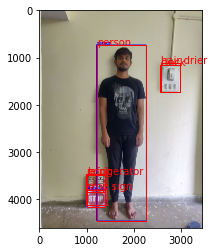

In [22]:
import glob
import cv2
from PIL import Image,ImageOps
from PIL.ExifTags import TAGS
import numpy as np
import dlib
import math
import torch

cv_img = []
d=0
# path= glob.glob(r"/content/drive/MyDrive/Project/Object Test Pics/IMG_20211226_205407.jpg")
image = utils.read_image(r"/content/drive/MyDrive/IMG_20220524_160344.jpg")
#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#image = cv2.medianBlur(image,3)
#image = cv2.GaussianBlur(image,(1,1),0)

# Working of model.predict method example:-
# the model’s predict method returns a tuple of 3 elements: labels, boxes, and scores. In the above example, the model predicted an alien (labels[0])
# at the coordinates [569, 204, 1003, 658] (boxes[0]) with a confidence level of 0.995 (scores[0]).
image = cv2.GaussianBlur(image,(3,3),0)
labels, boxes, scores = model.predict_top(image)
labels1, boxes1, scores1 = model.predict(image)
predictions = model.predict_top(image)
# print(labels)

for i in range(len(labels)):
        if labels[i] in ['person','stop sign']:
            x,y,w,h = boxes[i]
            cv2.rectangle(image,(int(x),int(y)),(int(w),int(h)),(0,0,255),10)
            cv2.putText(image,labels[i], (int(x), int(y)-10), cv2.FONT_HERSHEY_SIMPLEX, 3, (0,0,255),10)

    
# d=d+1
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(r"/content/shape_predictor_68_face_landmarks.dat")

# img1 = cv2.imread('path.tif', 1)
gray = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
faces = detector(gray)
for face in faces:
        # Create landmark object
        landmarks = predictor(image=gray, box=face)

        # Loop through all the points
        x = landmarks.part(8).x
        y = landmarks.part(8).y-landmarks.part(27).y
        # Draw a circle
        #cv2.circle(img=img, center=(x, int(landmarks.part(27).y-(y))), radius=4, color=(0, 255, 0), thickness=-1)
        break;
remarr=[]
for i in range(len(labels)):
        if labels[i]=='stop sign' or labels[i]=='no':
            remarr.append(boxes[i][3])
            

res1=max(remarr)-(landmarks.part(27).y-(5*y/6))    
#cv2.line(image,(x,int(landmarks.part(27).y-(5*y/6))),(x,max(remarr)),(0,255,0),7)
#cv2.line(image,(int(x),int(landmarks.part(27).int(y)-(5*int(y)/6))),(int(x),int(max(remarr)),(0,255,0),7)
cv2.imwrite(r"/content/drive/MyDrive/person5_test1_1.jpg",image)
# print(res1)
box_length=0;
idx=0;
for i in range(len(labels)):
  if labels[i]=='stop sign':
    box_length=boxes[i][3]-boxes[i][1]
    idx=i;

ratio=19.5/box_length
print("Ratio: ",ratio)
height=ratio*res1
print(height,"cm")

#  to check y co-ordinates..
# print(boxes[idx][3])
# print(boxes[idx][1])






# print(type(labels))
# print(type(scores))
# print(labels)
print(boxes)
# print(scores)
# print(type(labels1))
# print(type(scores1))
# print(labels1)
# print(boxes1)
# print(scores1)
# for i in range(len(scores)):
#   if scores[i]<0.10:
#     labels.pop(i)
#     boxes=torch.cat([boxes[0: i], boxes[i + 1: -1]])
#     scores=torch.cat([scores[0: i], scores[i + 1: -1]])

# print(boxes)
# print()
# print("Length of object in pixels:",(boxes[0][3]-boxes[0][1]))
# print(scores)
# print(labels)


    
    
a = round(float(height),2)
print("Height=",a,"cms")


# predictions = model.predict(image)

# From these predictions, we can plot the results using the detecto.visualize module.
visualize.show_labeled_image(image, boxes, labels)
# print(boxes)
# for i in range(len(labels)):
#     if labels[i] in ['person','remote','cell phone','bottle','sports ball']:
#         x,y,w,h = boxes[i]
#         cv2.rectangle(image,(x,y),(w,h),(0,0,255),10)
#         cv2.putText(image,labels[i], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 3, (0,0,255),10)

In [ ]:
print(labels)

In [ ]:
a = round(float(height),2)
print("Height=",a,"cms")

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
org = (900, 3600)
fontScale = 4
color = (0, 0, 255)
thickness = 11
ima = cv2.putText(image,str(a), org, font,fontScale, color, thickness, cv2.LINE_AA)
    
cv2.imwrite(r"/content/drive/MyDrive/person5_test1_1_res.jpg",ima)